In [1]:
import pandas as pd
import numpy as np
import re
import string
axis = 0
inplace = 0
data = pd.read_csv('Fake.csv')
data = pd.read_csv('True.csv')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Load data
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

data_fake["class"] = 0
data_true['class'] = 1

In [3]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
data_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
data_fake['class'] = 0
data_true['class'] = 1

In [6]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [7]:
# Kiểm tra thử thủ công , đối chiếu bằng tay
data_fake_manual_testing = data_fake.tail(10)#tạo ra một bản sao của 10 hàng cuối cùng trong "data_fake" và lưu vào "data_fake_manual_testing".
for i in range(23480, 23470, -1):# xóa các hàng từ 23480 đến 23470 trong "data_fake". 
    data_fake.drop([i], axis=0, inplace=True)#Dòng data_fake.drop([i]), axis == 0, inplace == True được sử dụng để xóa hàng có chỉ số i từ "data_fake"

data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis=0, inplace=True)

In [8]:
#các tập dữ liệu "data_fake_manual_testing" và "data_true_manual_testing" và gán giá trị 0 cho cột "class" trong 
# "data_fake_manual_testing" và gán giá trị 1 cho cột "class" trong "data_true_manual_testing".
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

C:\Users\ACER\AppData\Local\Temp\ipykernel_17292\277247672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\ACER\AppData\Local\Temp\ipykernel_17292\277247672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [10]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [9]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
##tạo một DataFrame mới được gọi là "data_merge" bằng cách nối (concatenate) các DataFrame "data_fake" và "data_true" theo chiều dọc (axis=0).
data_merge = pd.concat([data_fake, data_true], axis=0)
data = data_merge.drop(['title', 'subject', 'date'], axis=1)

In [12]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [13]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ACER\AppData\Local\Temp\ipykernel_17292\1031775046.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\ACER\AppData\Local\Temp\ipykernel_17292\1031775046.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\ACER\AppData\Local\Temp\ipykernel_17292\1031775046.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [14]:
data['text'] = data['text'].apply(wordopt)

In [15]:
x = data['text']
y = data['class']

In [31]:
#Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [32]:
# Logistic Regression with TF-IDF
#chuyển đổi dữ liệu thô thành ma trận để tiếp tục xử lý
#TF-IDF là một phương pháp để đánh giá tầm quan trọng của một từ trong một văn bản
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
#fit_transform() là một phương thức trong TfidfVectorizer (và cũng là phương thức chung trong scikit-learn)
xv_test = vectorization.transform(x_test)


In [33]:
# Logistic Regression
LR = LogisticRegression()
#thư viện scikit-learn, LogisticRegression là một mô hình học máy dùng để thực hiện phân loại dựa trên thuật toán hồi quy logistic
LR.fit(xv_train, y_train)
#LR.fit() là một phương thức trong lớp LogisticRegression được sử dụng để huấn luyện (fit)
pred_lr = LR.predict(xv_test)
#sử dụng phương thức fit() để huấn luyện mô hình LR trên dữ liệu huấn luyện xv_train và nhãn tương ứng y_train.
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))

Logistic Regression Accuracy: 0.9879679144385026
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2375
           1       0.98      0.99      0.99      2113

    accuracy                           0.99      4488
   macro avg       0.99      0.99      0.99      4488
weighted avg       0.99      0.99      0.99      4488



Các thông số trong báo cáo phân loại bao gồm precision (độ chính xác), recall (độ phủ), f1-score (điểm F1) và support (số lượng mẫu trong mỗi lớp). Báo cáo phân loại giúp đánh giá hiệu suất của mô hình phân loại trên dữ liệu kiểm tra.

In [34]:
# Decision Tree Classifier
DT = DecisionTreeClassifier()
#tạo một đối tượng DT từ lớp DecisionTreeClassifier. Đối tượng này sẽ được sử dụng để xây dựng mô hình phân loại dựa trên cây quyết định.
DT.fit(xv_train, y_train)
# mô hình cây quyết định sẽ được huấn luyện trên ma trận các giá trị TF-IDF xv_train và nhãn y_train
pred_dt = DT.predict(xv_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))

Decision Tree Accuracy: 0.9971033868092691
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2375
           1       1.00      1.00      1.00      2113

    accuracy                           1.00      4488
   macro avg       1.00      1.00      1.00      4488
weighted avg       1.00      1.00      1.00      4488



classification_report(y_test, pred_dt) sử dụng hàm classification_report() để tính toán báo cáo phân loại dựa trên nhãn thực tế 
y_test và nhãn dự đoán pred_dt. Báo cáo phân loại cung cấp thông tin về độ chính xác, độ phủ và các thông số khác liên quan đến phân loại.
#Các thông số trong báo cáo phân loại bao gồm precision (độ chính xác), recall (độ phủ), f1-score (điểm F1) và support (số lượng mẫu trong mỗi lớp). Báo cáo phân loại giúp đánh giá hiệu suất của mô hình phân loại trên dữ liệu kiểm tra.


In [35]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)


In [36]:
# Pad sequences to ensure equal length
maxlen = 100
x_train_pad = pad_sequences(x_train_seq, maxlen=maxlen)
x_test_pad = pad_sequences(x_test_seq, maxlen=maxlen)


In [37]:
# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(5000, 128, input_length=maxlen))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(64, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
# Train the CNN model
history = cnn_model.fit(x_train_pad, y_train, epochs=10, batch_size=64, validation_data=(x_test_pad, y_test))

Epoch 1/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 49s 72ms/step - accuracy: 0.8529 - loss: 0.2676 - val_accuracy: 0.9804 - val_loss: 0.0584
Epoch 2/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9890 - loss: 0.0333 - val_accuracy: 0.9860 - val_loss: 0.0449
Epoch 3/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9954 - loss: 0.0139 - val_accuracy: 0.9804 - val_loss: 0.0816
Epoch 4/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9826 - val_loss: 0.0771
Epoch 5/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9840 - val_loss: 0.0733
Epoch 6/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 53s 84ms/step - accuracy: 0.9988 - loss: 0.0035 - val_accuracy: 0.9846 - val_loss: 0.0927
Epoch 7/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 68s 107ms/step - accuracy: 0.9984 - loss: 0.0063 - val_accuracy: 0.9837 - val_loss: 0.1207
Epoch 8/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 0.9978 - loss: 0.0085 

In [39]:
# Plotting loss and accuracy
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Loss over Epochs')

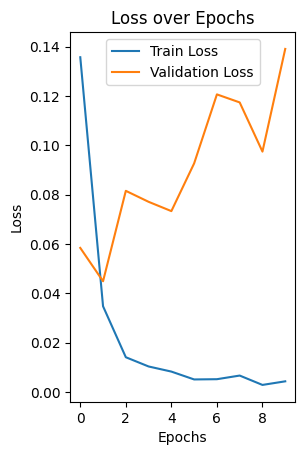

In [40]:
# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

Text(0.5, 1.0, 'Accuracy over Epochs')

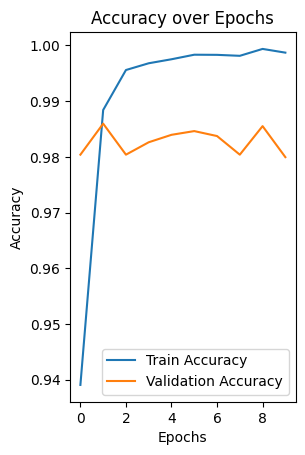

In [41]:
# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

In [42]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [43]:
def output_lable(n): #output_lable(n) là một hàm được định nghĩa để chuyển đổi nhãn số thành nhãn văn bản. Nếu n là 0, hàm sẽ trả về chuỗi 'Fake News', và nếu n là 1, hàm sẽ trả về chuỗi 'Not a Fake News'.
    if n == 0:
        return 'Fake News'
    elif n == 1:
        return 'Not a Fake News'
    
def manual_testing(news):
    testing_news = {'text':[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(wordopt)
    new_x_test = new_def_test['text']
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)

    return print('\n\nLR Prediction: {} \nDT Prediction:'.format(output_lable(pred_LR[0]),
                                                                output_lable(pred_DT[0])))

In [44]:
news = str(input())
#news = str(input()) hàm input() để nhận đầu vào từ người dùng dưới dạng chuỗi. 
#Hàm str() được sử dụng để đảm bảo rằng đầu vào được chuyển đổi thành kiểu dữ liệu chuỗi.

manual_testing(news)



LR Prediction: Fake News 
DT Prediction:
